# Time Series Forecasting for Covid-19 daily new cases in Missouri state using  Prophet

In [128]:
# Python
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt


In [129]:
df = pd.read_csv('cases.csv')
print(df)

     State  County  Zip        Date
0     1267     387   13  08/13/2020
1     1245     289   10  08/14/2020
2     1127     256    7  08/15/2020
3     1342     187    5  08/16/2020
4     1148     150    9  08/17/2020
..     ...     ...  ...         ...
96    2562     772  203    12/15/20
97    2762     663  211    12/16/20
98    2673     478  225    12/17/20
99    3569     776  214    12/18/20
100   3723    1182  205    12/19/20

[101 rows x 4 columns]


In [130]:
#Missouri state data

In [131]:
df = pd.read_csv('cases.csv')
df["Date"]=pd.to_datetime(df["Date"])
df_MO = df[["Date","State"]]
df_MO = df_MO.rename(columns={'State': 'y', 'Date': 'ds'})
df_MO.head()

,ds,y
0,2020-08-13,1267
1,2020-08-14,1245
2,2020-08-15,1127
3,2020-08-16,1342
4,2020-08-17,1148


In [132]:
train_data = df_MO.iloc[:len(df_MO)-10]
test_data = df_MO.iloc[len(df_MO)-10:]
print(test_data)

            ds     y
91  2020-12-10  2640
92  2020-12-11  3858
93  2020-12-12  3900
94  2020-12-13  3743
95  2020-12-14  2694
96  2020-12-15  2562
97  2020-12-16  2762
98  2020-12-17  2673
99  2020-12-18  3569
100 2020-12-19  3723


In [145]:
m = Prophet()
m.fit(train_data)
future = m.make_future_dataframe(periods=10)
prophet_pred = m.predict(future)
prophet_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
96,2020-12-15,3708.879267,2774.347579,4825.687248
97,2020-12-16,4225.123730,3180.058567,5237.988463
98,2020-12-17,4182.720042,3148.743320,5295.923601
99,2020-12-18,4703.366241,3661.983680,5768.672828
100,2020-12-19,4621.520095,3547.261071,5652.334872


In [149]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-10:]['ds'], "Pred" : prophet_pred[-10:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred

,Pred
Date,
2020-12-10,3977.593227
2020-12-11,4498.239425
2020-12-12,4416.393280
2020-12-13,4372.124526
2020-12-14,3967.085832
2020-12-15,3708.879267
2020-12-16,4225.123730
2020-12-17,4182.720042
2020-12-18,4703.366241


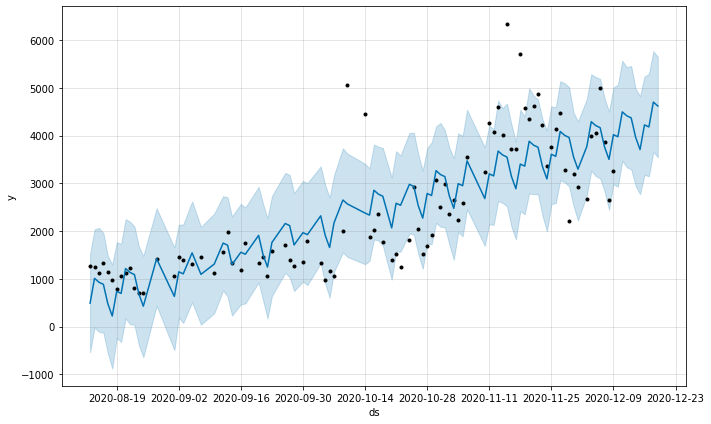

In [146]:
fig1 = m.plot(prophet_pred)

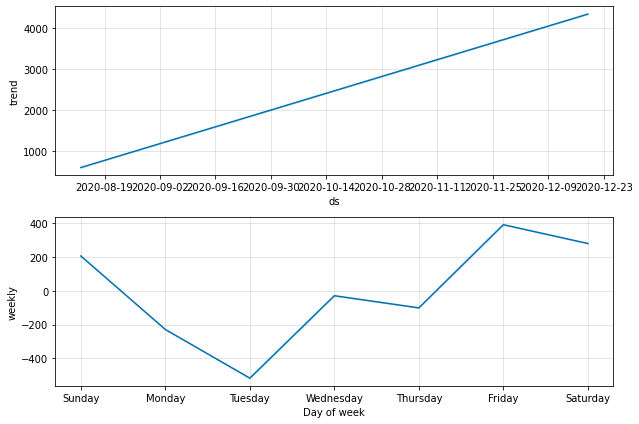

In [148]:
fig2 = m.plot_components(prophet_pred)

<ipython-input-150-b9d8127c6aa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Prophet_Predictions"] = prophet_pred['Pred'].values


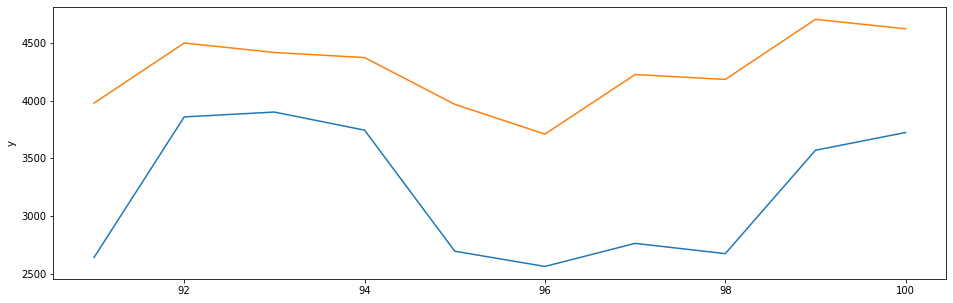

In [150]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["y"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [151]:
#The blue line represents dialy new Covid cases in Missouri state and the orange line represents Prophet Predictions.

In [152]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(test_data['y'], test_data["Prophet_Predictions"]))
#print('Mean Squared Error:', metrics.mean_squared_error(test_data['y'], test_data["Prophet_Predictions"]))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_data['y'], test_data["Prophet_Predictions"])))

mse_error = mean_squared_error(test_data['y'], test_data["Prophet_Predictions"])
rmse_error = np.sqrt(mse_error)
mean_value = df['State'].mean()

print(f'MSE Error: {mse_error}\nRMSE Error: {rmse_error}\nMean: {mean_value}')

MSE Error: 1231171.2224796102
RMSE Error: 1109.5815528746007
Mean: 2504.6732673267325
